# Solutions to Exercise set 5

# Problem 1
## 1. a)

The objective is to minimize a function
$$
f(x') = \sum_{i=1}^n (x_i - x')^2.
$$
Let's first differentiate this function with respect to $x'$:
$$
f'(x') = -2\sum_{i=1}^n (x_i - x') = -2\left(\sum_{i=1}^n x_i - nx' \right).
$$
and then find the critical points of the function by solving where this derivative is zero:
$$
\begin{split}
f'(x')  &= -2\left(\sum_{i=1}^n x_i - nx' \right) = 0 \\
x' &= \frac{1}{n} \sum_{i=1}^n x_i.
\end{split}
$$
Type of this critical point can be found by considering the second derivative of $f(\mathbf{x'})$. Because the second derivative
$$
f''(x') = 2n
$$
is always positive, $f(x')$ is a convex function, and so 
$$
x^* = \frac{1}{n} \sum_{i=1}^n x_i
$$
is its global minimum point. This could also be observed without computing the second derivative from the fact that $f(x')$ is a parabola that opens upwards; its only critical point is then its global minimum point.



## 1. b)

Now the function to minimize is 
$$
\begin{split}
f(\mathbf{x'}) &= \sum_{i=1}^n ||\mathbf{x}_i - \mathbf{x}'||^2_2 = \sum_{i=1}^n \sum_{j=1}^p (x_{ij} - x'_j)^2 \\
&= \sum_{i=1}^n (x_{i1} - x_1')^2 + \dots + \sum_{i=1}^n(x_{ip} - x_p')^2.
\end{split} 
$$
Because the value of $j$:th term of the sum depends only on the $j$:th component of $\mathbf{x}'$, the  minimum value of this function can be found by minimizing each of the components separately: 
$$
{\mathbf{x}}^* := \underset{\mathbf{x}'}{\text{argmin}}\,\,f(\mathbf{x}')= \left(\underset{x_1'}{\text{argmin}} \sum_{i=1}^n (x_{i1} - x_1')^2, \dots, \underset{x_p'}{\text{argmin}} \sum_{i=1}^n (x_{ip} - x_p')^2 \right)
$$
But from the first part of the exercise we observe that this is just
$$
{\mathbf{x}}^* = \left(\frac{1}{n} \sum_{i=1}^n x_{i1}, \dots , \frac{1}{n} \sum_{i=1}^n x_{ip} \right) = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i.
$$

# Problem 2
## 2. a)
Let's simulate hierarchical agglomerative clustering with single linkage by using pen and paper as instructed:
![](ex6_2a.png)


## 2. b)
Let's also simulate the clustering with complete linkage:
![](ex6_2b.png)

# Problem 3
## 3. a)

First we will implement the Lloyds algorithm for $k$-means (this version is not very highly optimized):

In [1]:
# k-means clustering 
#
# X = data set to cluster, row = variable, col = data point (to make things more 
# interesting, this is other way than normally)
# K = number of cluster centeroints
# max_iterations = maximum number of iterations before quitting, if the algorithm
# does not converge before that.
# mu = cluster centerpoints, if not given then allocate data points into K
# groups randomly, and use their centers as the initial centerpoints.
#
# return = list with 2 components:
#   mu = cluster centerpoints,
#   C = cluster labels for each data point
k_means <- function(X, K, mu = NULL, max_iterations = 200) {
  n <- ncol(X)
  p <- nrow(X)
  C <- NULL
  C_old <- 0
  if(is.null(mu)) {
    mu <- matrix(numeric(K * p), nrow = p) # cluster centerpoints
    C <- sample(K, n, replace = TRUE)      # allocate points into K clusters randomly
  } 
  
  for(j in 1:max_iterations) {
    # compute new cluster centerpoints
    if(!is.null(C)) {
      for(i in 1:K) mu[ ,i] <- rowMeans(X[ ,C == i, drop = FALSE])
      C_old <- C
    }
        
    # compute distances to the cluster centerpoints 
    distances <- matrix(numeric(K * n), nrow = K)
    for(i in 1:K) distances[i, ] <- colSums((X - mu[ ,i])^2)
    
    # update the cluster membership labels for each of the data points.
    C <- max.col(-t(distances)) 
    
    # test for convergence 
    if(identical(C, C_old)) { 
      cat("Converged in", j, "iterations.\n")
      return(list(mu = mu, C = C))
    }
  }
  cat("Failed to converge in", max_iterations, "iterations\n")
  list(mu = mu, C = C)
}


Let's generate a data set and test our implementation:

Converged in 15 iterations.
Converged in 4 iterations.
Converged in 6 iterations.
Converged in 16 iterations.


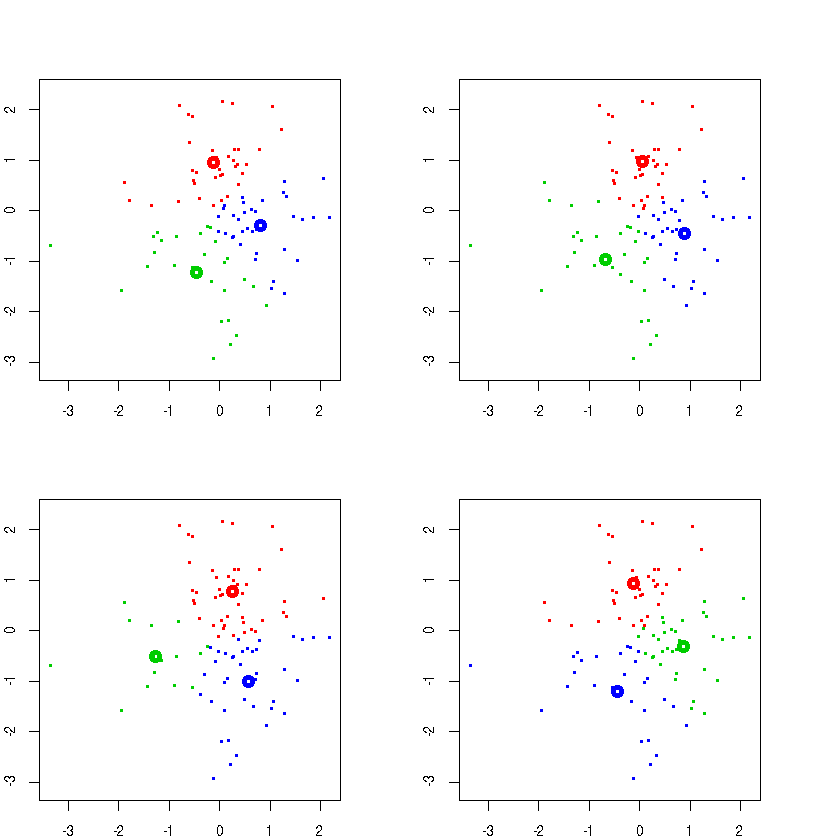

In [2]:
# generate the data set
n <- 100
p <- 2
X <- matrix(rnorm(p * n), nrow = 2)


# test that our implemenation works correctly
par(mfrow = c(2,2), mar = c(2,2,4,4))
for(i in 1:4) {
    km <- k_means(X, 3)
    plot(X[1, ], X[2, ], pch = 20, cex = .5, asp = 1, col = km$C+1)
    lines(km$mu[1, ], km$mu[2, ], type = 'p', lwd = 4, col = (1:3)+1)
}

We can observe that the final cluster centerpoints for the converged algorithm are different for most of the runs. This is because the algorithm converges into the different local minimum depending on the random initial values.

## b)
Next we will load the classic MNIST data set consisting of hand-written digits:

In [3]:
# install.packages('R.utils') # for gunzip()

base_dir <- 'mnist/'
if(!dir.exists(base_dir)) {
    message('Downloading MNIST data set...')
    dir.create(base_dir)
    
    base_url <- 'http://yann.lecun.com/exdb/mnist/'
    files <- c('train-labels-idx1-ubyte.gz',
               'train-images-idx3-ubyte.gz',
               't10k-images-idx3-ubyte.gz',
               't10k-labels-idx1-ubyte.gz')
    for(filename in files) {
        full_path = paste0(base_dir, filename)
        download.file(paste0(base_url, filename), destfile = full_path)
        R.utils::gunzip(full_path)                     
    }
    
    message('Download complete.')
} else {
    message('MNIST data set already downloaded.')
}


MNIST data set already downloaded.


Let's load the downloaded data set and check that everything works correctly by printing the fifth digit:

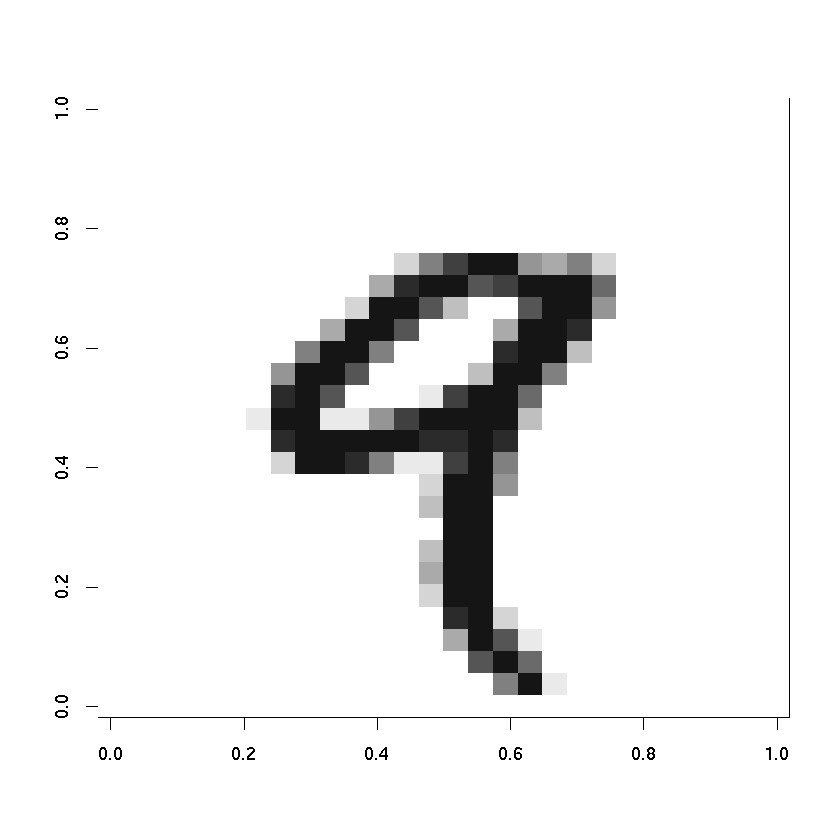

In [4]:
source('loadmnist.R')

load_mnist()
n_train <- 500
X <- t(train$x[1:n_train, ])

show_digit(X[ ,5])



Looks kinda something like a digit nine...

## 3. c)
Okay, now it is a time to test our k-means clustering algorithm with a real data set. Let's initialize the cluster prototypes to the first ten digits, and visualize the results by plotting the cluster prototypes (the leftmost column of the picture) and some example digits (each row represents one cluster) from each of the clusters after the convergence:

Converged in 16 iterations.


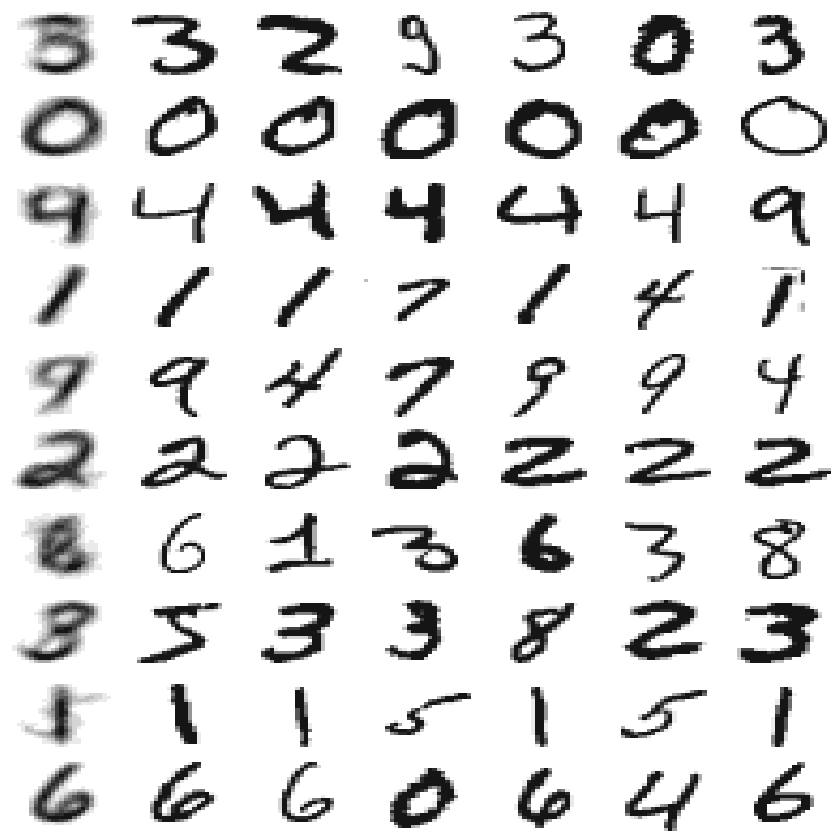

In [5]:
K <- 10
p <- nrow(X)
mu <- matrix(numeric(p * K), ncol = K)
for(i in 1:K) mu[ ,i] <- X[ ,i]

km_mnist <- k_means(X, 10, mu = mu)

# plot cluster prototypes and example digits
n_row <- 6 # number of example digits to print / cluster
par(mfrow = c(K, n_row + 1), mar = c(0,0,0,0))
for(i in 1:10) {
  show_digit(km_mnist$mu[,i], axes = FALSE)
  cluster_indices <- (1:ncol(X))[km_mnist$C == i]
  for(j in 1:n_row) {
    show_digit(X[ ,cluster_indices[j]], axes = FALSE)
  }
}

It seems to actually work! Even though most of the clusters consist of several different digits, there are some very pure clusters, such as the clusters of six and zeros. And even on the mixed clusters the shapes of the digits  resemble each other. Of course we have to remember that this is unupervised learning: the algorithm does not even try to classify digits, but just to cluster them into 10 similar groups.


Let's see if the result change by setting the initial cluster prototypes to 10 different digits:

Converged in 6 iterations.


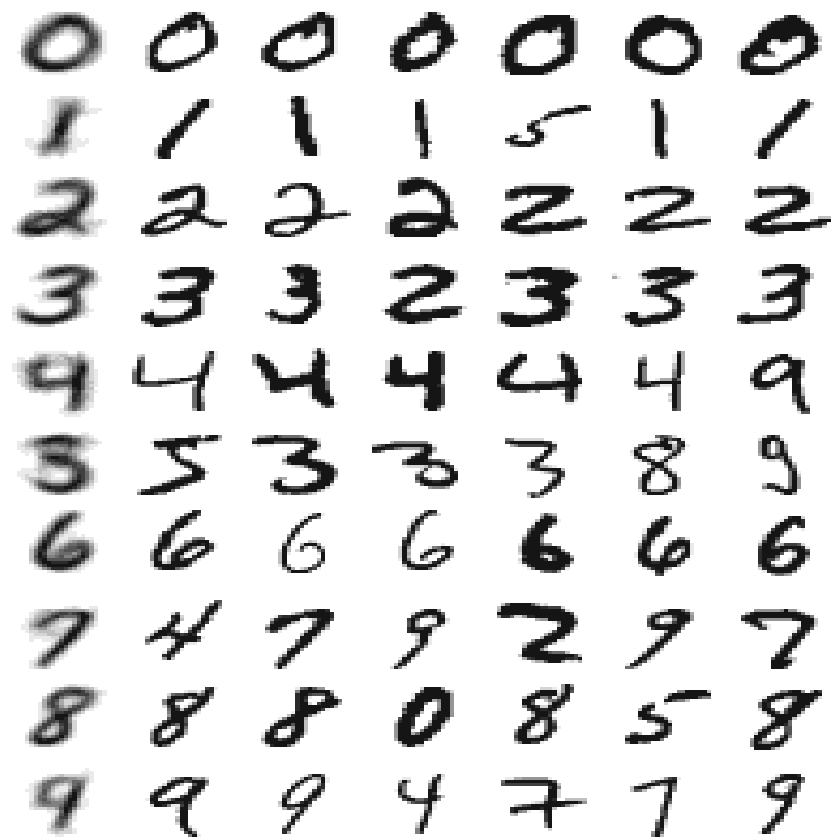

In [6]:
Y <- train$y[1:n_train]

# select different digit for each cluster mean
mu <- matrix(numeric(p * K), ncol = K)
for(i in 1:K) mu[ ,i] <- X[ ,which(Y == (i-1))[1]]

km_mnist <- k_means(X, 10, mu = mu)

# plot cluster prototypes and example digits
n_row <- 6 # number of example digits to print / cluster
par(mfrow = c(10, n_row + 1), mar = c(0,0,0,0))
for(i in 1:10) {
  show_digit(km_mnist$mu[,i], axes = FALSE)
  cluster_indices <- (1:ncol(X))[km_mnist$C == i]
  for(j in 1:n_row) {
    show_digit(X[ ,cluster_indices[j]], axes = FALSE)
  }
}

Now each cluster prototype resembles their initial values. Also the clusters seem to be more pure, and the algorithm converges faster. Although we 'cheated' here little bit by using the true class labels to initialize the cluster prototypes, this demonstrates that k-means is sensitive to the choice of initial values, and that its performance can be improved by choosing good initial values.